In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/sample_data/GW-Python.csv")
print(dataset)

               W/B   Slope  Longitude  Latitude
0           Kappil  0.0507    76.6839    8.7761
1            Edava -0.0800    76.6972    8.7611
2           Edavai -0.4024    76.7000    8.7611
3         TVM OW16 -0.1140    76.7025    8.7567
4          Varkala -0.0808    76.7167    8.7311
5     Varkala Deep -0.0209    76.7167    8.7322
6          Anjengo  0.0000    76.7569    8.6722
7   Kadakkavur(R1)  0.0760    76.7708    8.6792
8         TVM OW15 -0.1139    76.7883    8.6583
9           Azhoor  0.4225    76.7933    8.6483
10     Perumathura  0.0169    76.8061    8.6258
11          Thumba  0.0025    76.8797    8.5339
12        TVM OW13 -0.0787    76.8931    8.5106
13   Kochuveli(R1)  0.0609    76.9014    8.5028
14  Poonthura (R1)  0.0443    76.9417    8.4500
15        TVM OW01 -0.0948    76.9761    8.3894
16       Vizhinjam -0.0290    76.9911    8.3831
17         Chowara  0.0904    77.0214    8.3597
18       Tirupuram  0.1367    77.0608    8.3319
19       Poovar-II  0.0512    77.0736   

In [ ]:
Y = dataset.Slope.values
X = dataset[["Longitude","Latitude"]].values

print(Y)
print(X)


[ 0.0507 -0.08   -0.4024 -0.114  -0.0808 -0.0209  0.      0.076  -0.1139
  0.4225  0.0169  0.0025 -0.0787  0.0609  0.0443 -0.0948 -0.029   0.0904
  0.1367  0.0512  0.038 ]
[[76.6839  8.7761]
 [76.6972  8.7611]
 [76.7     8.7611]
 [76.7025  8.7567]
 [76.7167  8.7311]
 [76.7167  8.7322]
 [76.7569  8.6722]
 [76.7708  8.6792]
 [76.7883  8.6583]
 [76.7933  8.6483]
 [76.8061  8.6258]
 [76.8797  8.5339]
 [76.8931  8.5106]
 [76.9014  8.5028]
 [76.9417  8.45  ]
 [76.9761  8.3894]
 [76.9911  8.3831]
 [77.0214  8.3597]
 [77.0608  8.3319]
 [77.0736  8.3167]
 [77.0917  8.3006]]


[76.6839 76.6972 76.7    76.7025 76.7167 76.7167 76.7569 76.7708 76.7883
 76.7933 76.8061 76.8797 76.8931 76.9014 76.9417 76.9761 76.9911 77.0214
 77.0608 77.0736 77.0917]
[8.7761 8.7611 8.7611 8.7567 8.7311 8.7322 8.6722 8.6792 8.6583 8.6483
 8.6258 8.5339 8.5106 8.5028 8.45   8.3894 8.3831 8.3597 8.3319 8.3167
 8.3006]
[ 0.0507 -0.08   -0.4024 -0.114  -0.0808 -0.0209  0.      0.076  -0.1139
  0.4225  0.0169  0.0025 -0.0787  0.0609  0.0443 -0.0948 -0.029   0.0904
  0.1367  0.0512  0.038 ]
[2.63985209 1.91210278]
-219.26659917456777
[-0.0125261]
[0.00742611]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


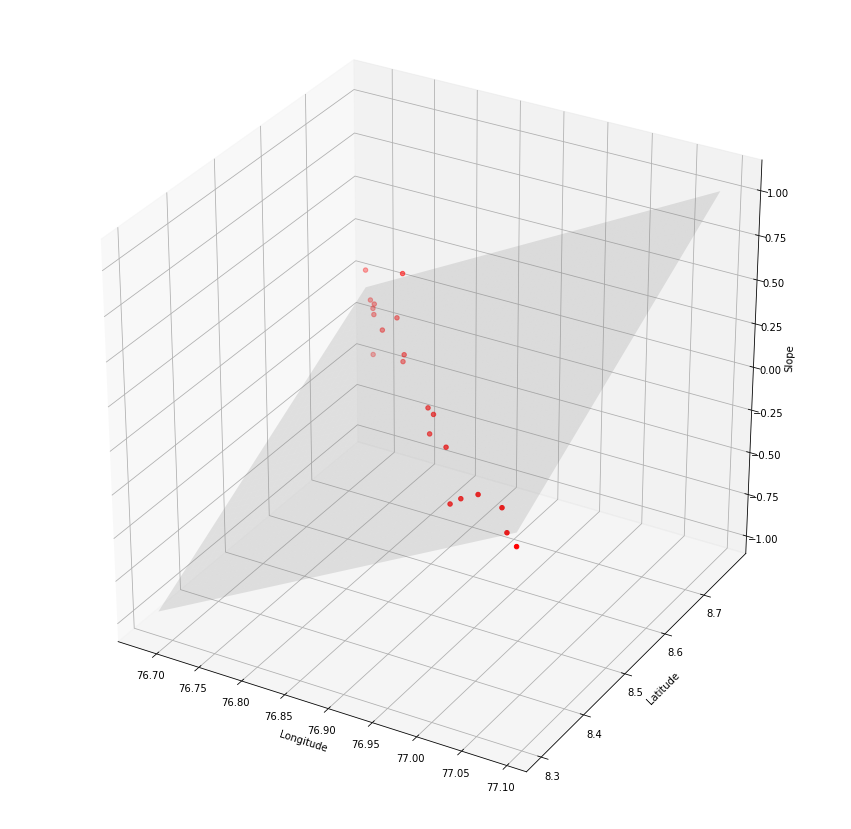

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x=dataset.Longitude.values
y=dataset.Latitude.values
z=dataset.Slope.values

print(x)
print(y)
print(z)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)
print(regressor.coef_)
print(regressor.intercept_)
print(regressor.predict(np.array([[76.91237030,8.48112950]])))
print(regressor.predict(np.array([[76.99861111,8.3725]])))

x_surf, y_surf = np.meshgrid(np.linspace(dataset.Longitude.min(),dataset.Longitude.max(),100),np.linspace(dataset.Latitude.min(),dataset.Latitude.max(),100))
only_x=pd.DataFrame({"Longitude":x_surf.ravel(),"Latitude":y_surf.ravel()})
fitted_y=regressor.predict(only_x)
fitted_y=np.array(fitted_y)

ax.scatter(x,y, z, c='r', marker='o')
ax.plot_surface(x_surf,y_surf,fitted_y.reshape(x_surf.shape),color="gray",alpha=0.2)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Slope")
plt.show()

#Equation of plane => x/2.639852 + y/1.912103 - z/219.266599 = 1
